<a href="https://colab.research.google.com/github/amaliahwang/MACHINE-LEARNING---ClassificationRiceLeafDiseases/blob/main/Rice_Leaf_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.preprocessing import image
from google.colab import files
import pandas as pd
from pandas.core.dtypes.common import classes
from sklearn.model_selection import train_test_split
from sklearn.utils import validation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/My Drive/Rice Leaf Diseases/'
!ls "/content/drive/My Drive/Rice Leaf Diseases/"

bahan  training  validasi


In [ ]:
# menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir =os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validasi')

print("Traning directory:", train_dir)
print("Validasi directory:",validation_dir)

Traning directory: /content/drive/My Drive/Rice Leaf Diseases/training
Validasi directory: /content/drive/My Drive/Rice Leaf Diseases/validasi


In [ ]:
# menentukan isi diroktori bahan
Bacterialleaf_dir = os.path.join(bahan_dir, 'Bacterial leaf blight')
Brownspot_dir = os.path.join(bahan_dir, 'Brown spot')
Leafsmut_dir = os.path.join(bahan_dir, 'Leaf smut')

#menampilkan isi
print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Bacterial leaf blight  :', len(os.listdir(Bacterialleaf_dir)))
print('Jumlah gambar Brown spot  :', len(os.listdir(Brownspot_dir)))
print('Jumlah gambar Leaf smut  :', len(os.listdir(Leafsmut_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar Bacterial leaf blight  : 40
Jumlah gambar Brown spot  : 40
Jumlah gambar Leaf smut  : 40


In [ ]:
#menentukan isi direktori tranining
train_bacterialleaf = os.path.join(train_dir, 'Bacterial leaf blight/')
train_brownspot = os.path.join(train_dir, 'Brown spot/')
train_leafsmut = os.path.join(train_dir, 'Leaf smut/')

#menentukan isi direktori validasi
validation_bacterialleaf = os.path.join(validation_dir, 'Bacterial leaf blight/')
validation_brownspot = os.path.join(validation_dir, 'Brown spot/')
validation_leafsmut = os.path.join(validation_dir, 'Leaf smut/')

**Menyiapkan Dataset**

In [ ]:
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    # Menyalin file ke folder training
    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    # Menyalin file ke folder validasi
    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)

    return train_files, val_files

# Jumlah pembagian data training dan validasi
train_ratio = 0.8

# Definisikan path direktori sumber untuk masing-masing kategori
Bacterialleaf_dir = "/content/drive/My Drive/Rice Leaf Diseases/bahan/Bacterial leaf blight"
Brownspot_dir = "/content/drive/My Drive/Rice Leaf Diseases/bahan/Brown spot"
Leafsmut_dir = "/content/drive/My Drive/Rice Leaf Diseases/bahan/Leaf smut"

# Definisikan path direktori tujuan untuk masing-masing kategori training dan validasi
train_bacterialleaf = "/content/drive/My Drive/Rice Leaf Diseases/training/Bacterial leaf blight"
validation_bacterialleaf = "/content/drive/My Drive/Rice Leaf Diseases/validasi/Bacterial leaf blight"

train_brownspot = "/content/drive/My Drive/Rice Leaf Diseases/training/Brown spot"
validation_brownspot = "/content/drive/My Drive/Rice Leaf Diseases/validasi/Brown spot"

train_leafsmut = "/content/drive/My Drive/Rice Leaf Diseases/training//Leaf smut"
validation_leafsmut = "/content/drive/My Drive/Rice Leaf Diseases/validasi//Leaf smut"

# Pembagian Training dan Validasi
train_val_split(Bacterialleaf_dir, train_bacterialleaf, validation_bacterialleaf, train_ratio)
train_val_split(Brownspot_dir, train_brownspot, validation_brownspot, train_ratio)
train_val_split(Leafsmut_dir, train_leafsmut, validation_leafsmut, train_ratio)


(['DSC_0308.JPG',
  'DSC_0320.JPG',
  'DSC_0513.jpg',
  'DSC_0335.JPG',
  'DSC_0510.jpg',
  'DSC_0319.jpg',
  'DSC_0514.jpg',
  'DSC_0500.jpg',
  'DSC_0506.jpg',
  'DSC_0512.jpg',
  'DSC_0293.JPG',
  'DSC_0503.jpg',
  'DSC_0310.JPG',
  'DSC_0318.JPG',
  'DSC_0321.JPG',
  'DSC_0317.JPG',
  'DSC_0507.jpg',
  'DSC_0338.JPG',
  'DSC_0328.jpg',
  'DSC_0331.JPG',
  'DSC_0516.jpg',
  'DSC_0504.jpg',
  'DSC_0501.jpg',
  'DSC_0505.jpg',
  'DSC_0314.JPG',
  'DSC_0309.JPG',
  'DSC_0313.JPG',
  'DSC_0336.jpg',
  'DSC_0322.jpg',
  'DSC_0330.jpg',
  'DSC_0502.jpg',
  'DSC_0508.jpg'],
 ['DSC_0515.jpg',
  'DSC_0312.JPG',
  'DSC_0327.JPG',
  'DSC_0339.jpg',
  'DSC_0316.JPG',
  'DSC_0315.jpg',
  'DSC_0511.jpg',
  'DSC_0509.jpg'])

In [ ]:
print('Jumlah All Bacterial leaf blight    :', len(os.listdir(Bacterialleaf_dir)))
print('Jumlah Train Bacterial leaf blight  :', len(os.listdir(train_bacterialleaf)))
print('Jumlah Val Bacterial leaf blight    :', len(os.listdir(validation_bacterialleaf)))

print('Jumlah All Brown spot               :', len(os.listdir(Brownspot_dir)))
print('Jumlah Train Brown spot             :', len(os.listdir(train_brownspot)))
print('Jumlah Val Brown spot               :', len(os.listdir(validation_brownspot)))

print('Jumlah All Leaf smut                :', len(os.listdir(Leafsmut_dir)))
print('Jumlah Train Leaf smut              :', len(os.listdir(train_leafsmut)))
print('Jumlah Val Leaf smut                :', len(os.listdir(validation_leafsmut)))

Jumlah All Bacterial leaf blight    : 40
Jumlah Train Bacterial leaf blight  : 40
Jumlah Val Bacterial leaf blight    : 31
Jumlah All Brown spot               : 40
Jumlah Train Brown spot             : 40
Jumlah Val Brown spot               : 31
Jumlah All Leaf smut                : 40
Jumlah Train Leaf smut              : 40
Jumlah Val Leaf smut                : 32


**Pre Processing**

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                horizontal_flip=True,
                shear_range=0.3,
                fill_mode='nearest',
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.1
)

val_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                horizontal_flip=True,
                shear_range=0.3,
                fill_mode='nearest',
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.1
)

**Target**

In [ ]:
length = len(bahan_dir)
test_batch_size = sorted([int(length / n) for n in range(1, length + 1) if length % n == 0 and length / n <= 80], reverse=True)[0]
test_steps = int(length / test_batch_size)
print('test batch size:', test_batch_size, 'test steps:', test_steps)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

test batch size: 48 test steps: 1
Found 120 images belonging to 3 classes.
Found 94 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')> 0.90):
        print('\nAkurasi mencapai 90%')
        self.model.stop_training = True

callbacks = myCallback()

**Fungsi untuk menampilkan beberapa contoh gambar**



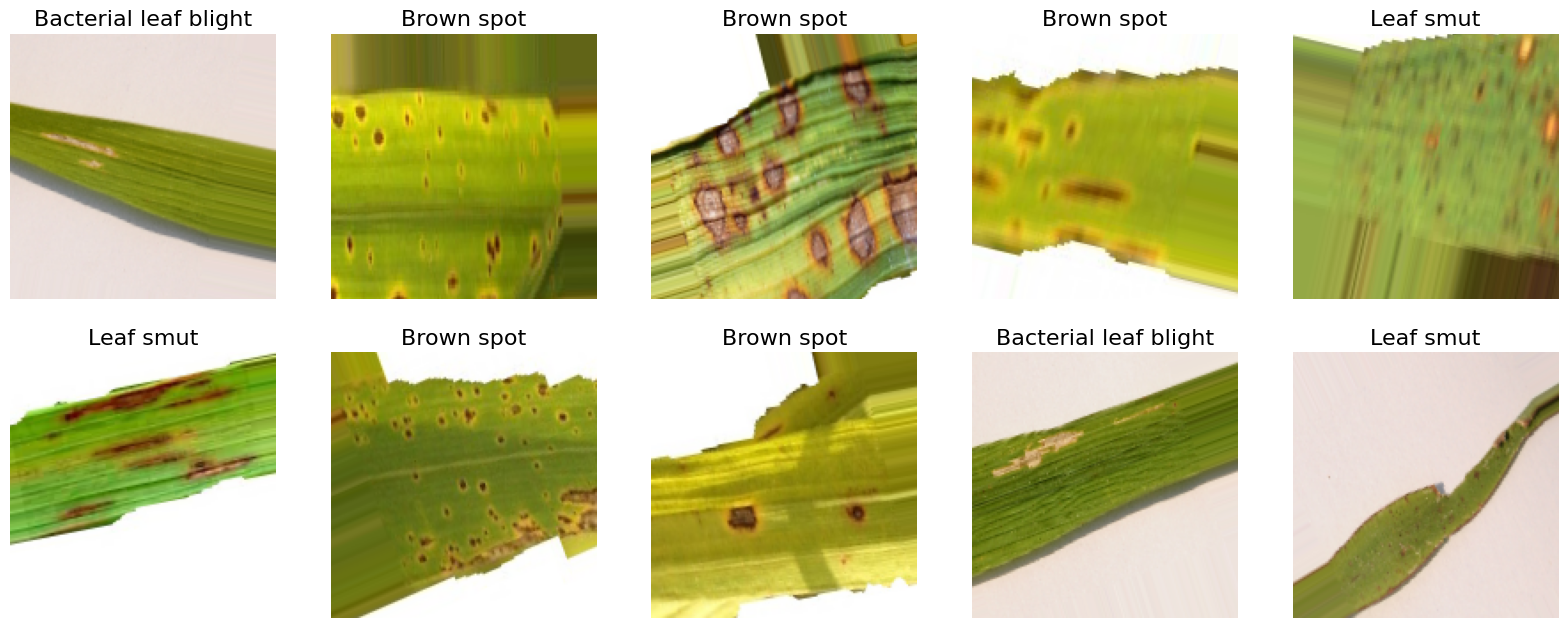

In [ ]:
def show_image_samples(gen):
    images, labels = next(gen)  # Mengambil satu batch contoh gambar dari generator
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:  # Tampilkan maksimal 25 gambar
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i]
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color='black', fontsize=16)
        plt.axis('off')
    plt.show()

classes = list(train_generator.class_indices.keys())  # Mendapatkan daftar nama kelas
show_image_samples(train_generator)


**Model CNN**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, input_shape=(150, 150, 3), kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 20)        1820      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 20)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 40)        7240      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 40)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
   train_generator,
    steps_per_epoch=10,  # Jumlah batch yang diproses dalam satu epoch
    epochs=100,  # Jumlah epoch
    validation_data=val_generator,
    validation_steps=2,  # Jumlah batch validasi yang diproses
    verbose= 1,
    callbacks =[callbacks]
)

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 0.4658 - accuracy: 0.8100 - val_loss: 0.2361 - val_accuracy: 0.9000
Epoch 2/100
10/10 [==============================] - 17s 2s/step - loss: 0.3751 - accuracy: 0.8500 - val_loss: 0.3814 - val_accuracy: 0.8500
Epoch 3/100
10/10 [==============================] - 8s 718ms/step - loss: 0.3781 - accuracy: 0.8600 - val_loss: 0.2769 - val_accuracy: 0.9500
Epoch 4/100
10/10 [==============================] - 9s 959ms/step - loss: 0.4295 - accuracy: 0.8200 - val_loss: 0.3593 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 9s 911ms/step - loss: 0.4248 - accuracy: 0.8200 - val_loss: 0.1887 - val_accuracy: 0.9500
Epoch 6/100
10/10 [==============================] - 9s 806ms/step - loss: 0.3672 - accuracy: 0.8300 - val_loss: 0.3567 - val_accuracy: 0.8500
Epoch 7/100
10/10 [==============================] - 10s 1s/step - loss: 0.4463 - accuracy: 0.8200 - val_loss: 0.2067 - val_accuracy: 1.0000
Epoch

**Tingkat akurasi dan loss model**

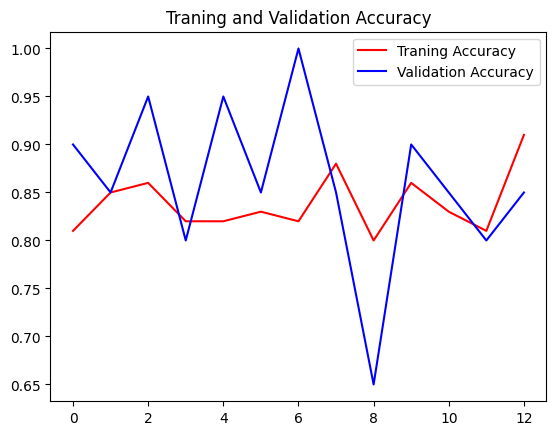

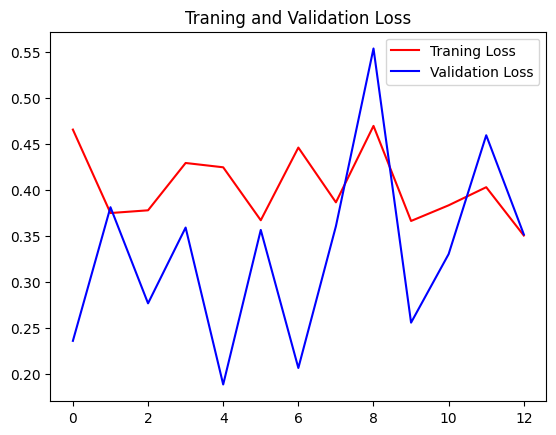

In [ ]:
%matplotlib inline


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Traning and Validation Loss')
plt.legend(loc = 'best')
plt.show()

**Mencoba Klasifikasi**

Saving hawar-4.jpg to hawar-4 (7).jpg
1/1 [==============================] - 0s 33ms/step
hawar-4.jpg
Gambar ini merupakan gambar penyakit Leaf smut


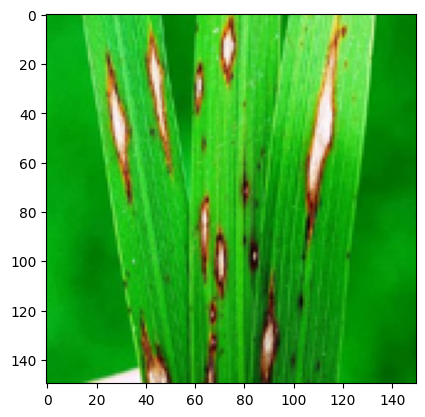

In [ ]:
from PIL import Image

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = Image.open(path).convert("RGB")
    img = img.resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.array(img)
    x = x / 255.0
    img_test = np.expand_dims(x, axis=0)
    images = np.vstack([img_test])
    classes = model.predict(images, batch_size=10)

    print(fn)
    class_list = os.listdir(train_dir)

    for j in range(len(class_list)):
        if classes[0][j] == 1.:
            print('Gambar ini merupakan gambar penyakit ', class_list[j])
            break
